<a href="https://colab.research.google.com/github/Vig-1704/TimeSeriesAnalysisofWeatherData/blob/main/TimeSeriesAnalysisOfWeatherData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing necessary python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Reading the data set
data  = pd.read_csv("Jharkhand_weather_data.csv")
data

,@STATION_ID,LATITUDE,LONGITUDE,ALTITUDE(m),TIME(GMT),DATE(GMT),TIME(IST),DATE(IST),AIR_TEMP(°C),WIND_SPEED(m/s),WIND_DIRECTION(deg),ATMO_PRESSURE(hpa),HUMIDITY(%),RAIN_FALL(mm),SUN_SHINE(hh:mm),BATTERY_VOLTAGE(V)
0,ISRO0930_15F3A2(DESE-ISM Dhanbad-),23.812222,86.4375,NaN,15,05-10-2010,20:30,05-10-2010,30.77,0.05,358.99,924.95,39.93,56.0,10:35,12.88
1,ISRO0930_15F3A2(DESE-ISM Dhanbad-),23.812222,86.4375,NaN,16,05-10-2010,21:30,05-10-2010,30.38,0.05,358.99,924.95,40.91,56.0,10:35,12.88
2,ISRO0930_15F3A2(DESE-ISM Dhanbad-),23.812222,86.4375,NaN,3,05-12-2010,08:30,05-12-2010,33.36,0.83,348.73,924.95,70.92,56.0,01:47,13.47
3,ISRO0930_15F3A2(DESE-ISM Dhanbad-),23.812222,86.4375,NaN,11,05-12-2010,16:30,05-12-2010,41.28,0.73,1.71,924.95,25.95,56.0,09:47,13.66
4,ISRO0930_15F3A2(DESE-ISM Dhanbad-),23.812222,86.4375,NaN,13,05-12-2010,18:30,05-12-2010,34.78,0.05,358.99,924.95,39.93,56.0,10:38,12.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50189,ISRO0930_15F3A2(DESE-ISM Dhanbad-),23.812222,86.4375,NaN,1,01-02-2019,06:30,01-02-2019,11.20,0.30,122.20,925.00,74.00,0.0,00:24,13.00
50190,ISRO0930_15F3A2(DESE-ISM Dhanbad-),23.812222,86.4375,NaN,2,01-02-2019,07:30,01-02-2019,11.80,0.30,114.90,925.00,71.00,0.0,01:18,13.00
50191,ISRO0930_15F3A2(DESE-ISM Dhanbad-),23.812222,86.4375,NaN,3,01-02-2019,08:30,01-02-2019,14.10,0.20,110.00,925.00,66.00,0.0,02:14,13.10
50192,ISRO0930_15F3A2(DESE-ISM Dhanbad-),23.812222,86.4375,NaN,4,01-02-2019,09:30,01-02-2019,18.80,0.40,303.00,925.00,52.00,0.0,03:14,13.40


In [ ]:
data.shape

(50194, 16)

In [ ]:
data.head()

,@STATION_ID,LATITUDE,LONGITUDE,ALTITUDE(m),TIME(GMT),DATE(GMT),TIME(IST),DATE(IST),AIR_TEMP(°C),WIND_SPEED(m/s),WIND_DIRECTION(deg),ATMO_PRESSURE(hpa),HUMIDITY(%),RAIN_FALL(mm),SUN_SHINE(hh:mm),BATTERY_VOLTAGE(V)
0,ISRO0930_15F3A2(DESE-ISM Dhanbad-),23.812222,86.4375,NaN,15,05-10-2010,20:30,05-10-2010,30.77,0.05,358.99,924.95,39.93,56.0,10:35,12.88
1,ISRO0930_15F3A2(DESE-ISM Dhanbad-),23.812222,86.4375,NaN,16,05-10-2010,21:30,05-10-2010,30.38,0.05,358.99,924.95,40.91,56.0,10:35,12.88
2,ISRO0930_15F3A2(DESE-ISM Dhanbad-),23.812222,86.4375,NaN,3,05-12-2010,08:30,05-12-2010,33.36,0.83,348.73,924.95,70.92,56.0,01:47,13.47
3,ISRO0930_15F3A2(DESE-ISM Dhanbad-),23.812222,86.4375,NaN,11,05-12-2010,16:30,05-12-2010,41.28,0.73,1.71,924.95,25.95,56.0,09:47,13.66
4,ISRO0930_15F3A2(DESE-ISM Dhanbad-),23.812222,86.4375,NaN,13,05-12-2010,18:30,05-12-2010,34.78,0.05,358.99,924.95,39.93,56.0,10:38,12.88


In [ ]:
data.tail()

,@STATION_ID,LATITUDE,LONGITUDE,ALTITUDE(m),TIME(GMT),DATE(GMT),TIME(IST),DATE(IST),AIR_TEMP(°C),WIND_SPEED(m/s),WIND_DIRECTION(deg),ATMO_PRESSURE(hpa),HUMIDITY(%),RAIN_FALL(mm),SUN_SHINE(hh:mm),BATTERY_VOLTAGE(V)
50189,ISRO0930_15F3A2(DESE-ISM Dhanbad-),23.812222,86.4375,NaN,1,01-02-2019,06:30,01-02-2019,11.2,0.3,122.2,925.0,74.0,0.0,00:24,13.0
50190,ISRO0930_15F3A2(DESE-ISM Dhanbad-),23.812222,86.4375,NaN,2,01-02-2019,07:30,01-02-2019,11.8,0.3,114.9,925.0,71.0,0.0,01:18,13.0
50191,ISRO0930_15F3A2(DESE-ISM Dhanbad-),23.812222,86.4375,NaN,3,01-02-2019,08:30,01-02-2019,14.1,0.2,110.0,925.0,66.0,0.0,02:14,13.1
50192,ISRO0930_15F3A2(DESE-ISM Dhanbad-),23.812222,86.4375,NaN,4,01-02-2019,09:30,01-02-2019,18.8,0.4,303.0,925.0,52.0,0.0,03:14,13.4
50193,ISRO0930_15F3A2(DESE-ISM Dhanbad-),23.812222,86.4375,NaN,5,01-02-2019,10:30,01-02-2019,20.0,0.3,347.0,925.0,45.0,0.0,04:14,13.5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50194 entries, 0 to 50193
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   @STATION_ID          50194 non-null  object 
 1   LATITUDE             50194 non-null  float64
 2   LONGITUDE            50194 non-null  float64
 3   ALTITUDE(m)          0 non-null      float64
 4   TIME(GMT)            50194 non-null  int64  
 5   DATE(GMT)            50194 non-null  object 
 6   TIME(IST)            50194 non-null  object 
 7   DATE(IST)            50194 non-null  object 
 8   AIR_TEMP(°C)         50194 non-null  float64
 9   WIND_SPEED(m/s)      50194 non-null  float64
 10  WIND_DIRECTION(deg)  50194 non-null  float64
 11  ATMO_PRESSURE(hpa)   50194 non-null  float64
 12  HUMIDITY(%)          50194 non-null  float64
 13  RAIN_FALL(mm)        50194 non-null  float64
 14  SUN_SHINE(hh:mm)     50194 non-null  object 
 15  BATTERY_VOLTAGE(V)   50194 non-null 

In [ ]:
# to check presence of duplicate data
data.nunique()

@STATION_ID               1
LATITUDE                  1
LONGITUDE                 1
ALTITUDE(m)               0
TIME(GMT)                24
DATE(GMT)              2362
TIME(IST)                24
DATE(IST)              2363
AIR_TEMP(°C)            550
WIND_SPEED(m/s)          63
WIND_DIRECTION(deg)     600
ATMO_PRESSURE(hpa)      465
HUMIDITY(%)             161
RAIN_FALL(mm)           693
SUN_SHINE(hh:mm)        869
BATTERY_VOLTAGE(V)       66
dtype: int64

In [ ]:
# identify of null values
data.isnull().sum()

@STATION_ID                0
LATITUDE                   0
LONGITUDE                  0
ALTITUDE(m)            50194
TIME(GMT)                  0
DATE(GMT)                  0
TIME(IST)                  0
DATE(IST)                  0
AIR_TEMP(°C)               0
WIND_SPEED(m/s)            0
WIND_DIRECTION(deg)        0
ATMO_PRESSURE(hpa)         0
HUMIDITY(%)                0
RAIN_FALL(mm)              0
SUN_SHINE(hh:mm)           0
BATTERY_VOLTAGE(V)         0
dtype: int64

In [ ]:
#Calculating the % of missing values in each column
((data.isnull().sum())/(len(data)))*100
# we see that the altitude column is 100% missing

@STATION_ID              0.0
LATITUDE                 0.0
LONGITUDE                0.0
ALTITUDE(m)            100.0
TIME(GMT)                0.0
DATE(GMT)                0.0
TIME(IST)                0.0
DATE(IST)                0.0
AIR_TEMP(°C)             0.0
WIND_SPEED(m/s)          0.0
WIND_DIRECTION(deg)      0.0
ATMO_PRESSURE(hpa)       0.0
HUMIDITY(%)              0.0
RAIN_FALL(mm)            0.0
SUN_SHINE(hh:mm)         0.0
BATTERY_VOLTAGE(V)       0.0
dtype: float64

In [ ]:
# Data Reduction
# Removing the "Altitude","Latitude", "Longitude", "Time", "Date", "Battery Voltage" columns
# Also replacing the fake values with NaN
data = data.dropna(axis = 1)
data = data.drop(['LATITUDE'], axis = 1)
data = data.drop(['LONGITUDE'], axis = 1)
data = data.drop(['TIME(GMT)'], axis = 1)
data = data.drop(['DATE(GMT)'], axis = 1)
data = data.drop(['BATTERY_VOLTAGE(V)'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50194 entries, 0 to 50193
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   @STATION_ID          50194 non-null  object 
 1   TIME(IST)            50194 non-null  object 
 2   DATE(IST)            50194 non-null  object 
 3   AIR_TEMP(°C)         50194 non-null  float64
 4   WIND_SPEED(m/s)      50194 non-null  float64
 5   WIND_DIRECTION(deg)  50194 non-null  float64
 6   ATMO_PRESSURE(hpa)   50194 non-null  float64
 7   HUMIDITY(%)          50194 non-null  float64
 8   RAIN_FALL(mm)        50194 non-null  float64
 9   SUN_SHINE(hh:mm)     50194 non-null  object 
dtypes: float64(6), object(4)
memory usage: 3.8+ MB


In [ ]:
# Beginning of EDA
data.describe().T
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
@STATION_ID,50194,1,ISRO0930_15F3A2(DESE-ISM Dhanbad-),50194,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TIME(IST),50194,24,16:30,2174,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DATE(IST),50194,2363,09/25/2010,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AIR_TEMP(°C),50194.0,NaN,NaN,NaN,27.887581,160.672658,-40.0,21.6,25.9,29.5,9999.9
WIND_SPEED(m/s),50194.0,NaN,NaN,NaN,0.753692,63.121408,0.0,0.0,0.2,0.54,9999.9
WIND_DIRECTION(deg),50194.0,NaN,NaN,NaN,365.525726,1061.002344,0.0,135.9,296.2,359.2,9999.9
ATMO_PRESSURE(hpa),50194.0,NaN,NaN,NaN,976.553407,58.26006,900.0,973.3,978.3,984.0,9999.9
HUMIDITY(%),50194.0,NaN,NaN,NaN,64.122031,49.392211,0.0,51.0,68.0,80.0,9999.9
RAIN_FALL(mm),50194.0,NaN,NaN,NaN,300.596763,384.272648,0.0,34.0,198.0,399.0,9999.9
SUN_SHINE(hh:mm),50194,869,00:00,2918,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Replacing the fake values of different parameters
data2 = data.copy();

for i in range(2,data2.shape[0]):
  cell_value = data2.at[i,'AIR_TEMP(°C)']
  if(cell_value>50 or cell_value<0):
    data2.at[i,'AIR_TEMP(°C)'] = np.nan

data2['WIND_SPEED(m/s)'] = data2['WIND_SPEED(m/s)'].replace(9999.9,np.nan)

for i in range(2,data2.shape[0]):
  cell_value = data2.at[i,'WIND_DIRECTION(deg)']
  if(cell_value>360):
    data2.at[i,'WIND_DIRECTION(deg)'] = np.nan

for i in range(2,data2.shape[0]):
  cell_value = data2.at[i,'ATMO_PRESSURE(hpa)']
  if(cell_value>1000):
    data2.at[i,'ATMO_PRESSURE(hpa)'] = np.nan

data2['HUMIDITY(%)'] = data2['HUMIDITY(%)'].replace(9999.9,np.nan)

for i in range(2,data2.shape[0]):
  cell_value = data2.at[i,'RAIN_FALL(mm)']
  if(cell_value>1100):
    data2.at[i,'RAIN_FALL(mm)'] = np.nan

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50194 entries, 0 to 50193
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   @STATION_ID          50194 non-null  object 
 1   TIME(IST)            50194 non-null  object 
 2   DATE(IST)            50194 non-null  object 
 3   AIR_TEMP(°C)         50194 non-null  float64
 4   WIND_SPEED(m/s)      50194 non-null  float64
 5   WIND_DIRECTION(deg)  50194 non-null  float64
 6   ATMO_PRESSURE(hpa)   50194 non-null  float64
 7   HUMIDITY(%)          50194 non-null  float64
 8   RAIN_FALL(mm)        50194 non-null  float64
 9   SUN_SHINE(hh:mm)     50194 non-null  object 
dtypes: float64(6), object(4)
memory usage: 3.8+ MB


In [ ]:
# Separation of Numerical & Categorical for easy analysis
cat_cols = data2.select_dtypes(include=['object']).columns
num_cols = data2.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['@STATION_ID', 'TIME(IST)', 'DATE(IST)', 'SUN_SHINE(hh:mm)'], dtype='object')
Numerical Variables:
['AIR_TEMP(°C)', 'WIND_SPEED(m/s)', 'WIND_DIRECTION(deg)', 'ATMO_PRESSURE(hpa)', 'HUMIDITY(%)', 'RAIN_FALL(mm)']


AIR_TEMP(°C)
Skew : -0.14


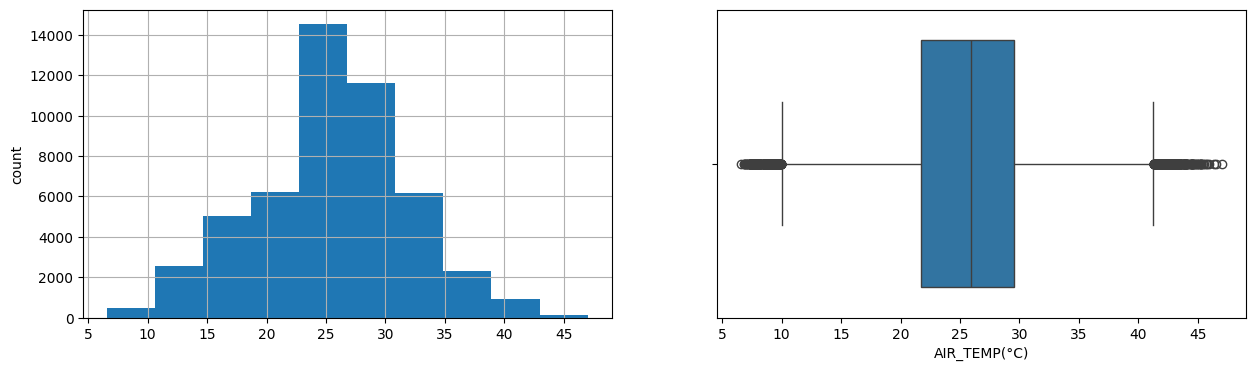

WIND_SPEED(m/s)
Skew : 21.57


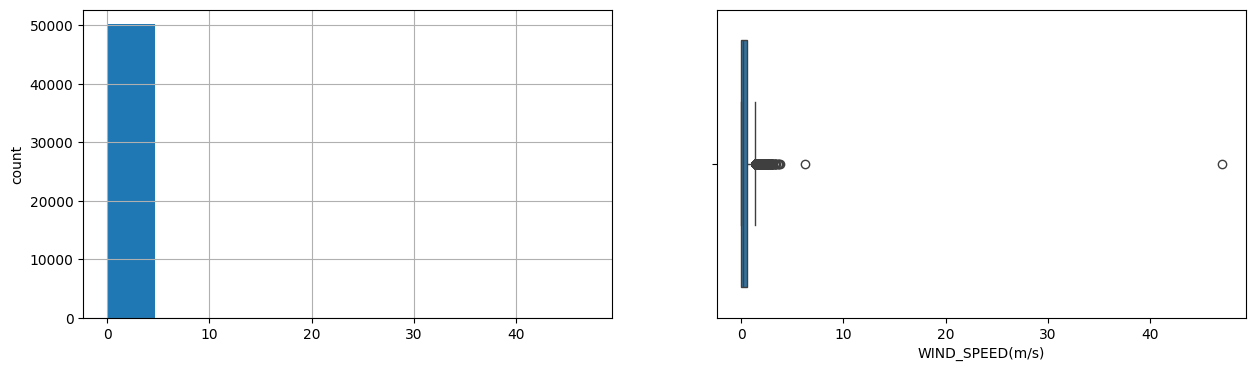

WIND_DIRECTION(deg)
Skew : -0.6


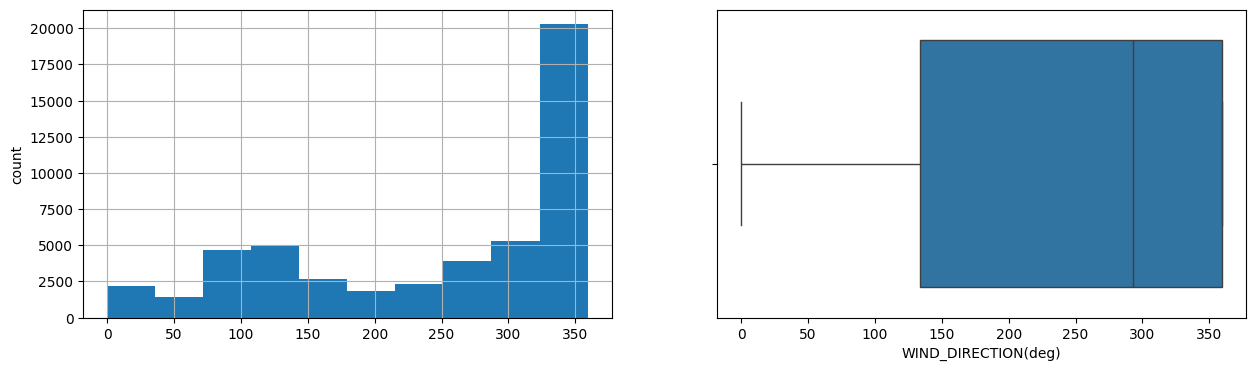

ATMO_PRESSURE(hpa)
Skew : -3.14


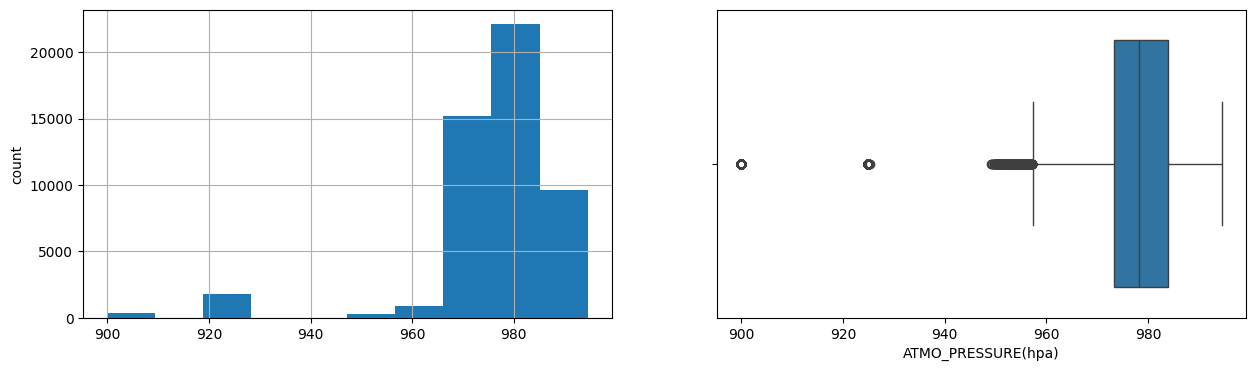

HUMIDITY(%)
Skew : -0.91


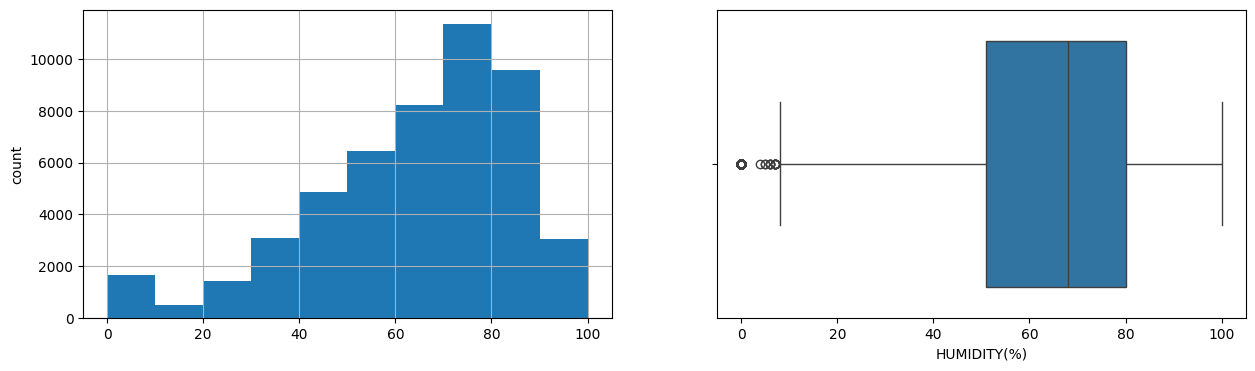

RAIN_FALL(mm)
Skew : 1.17


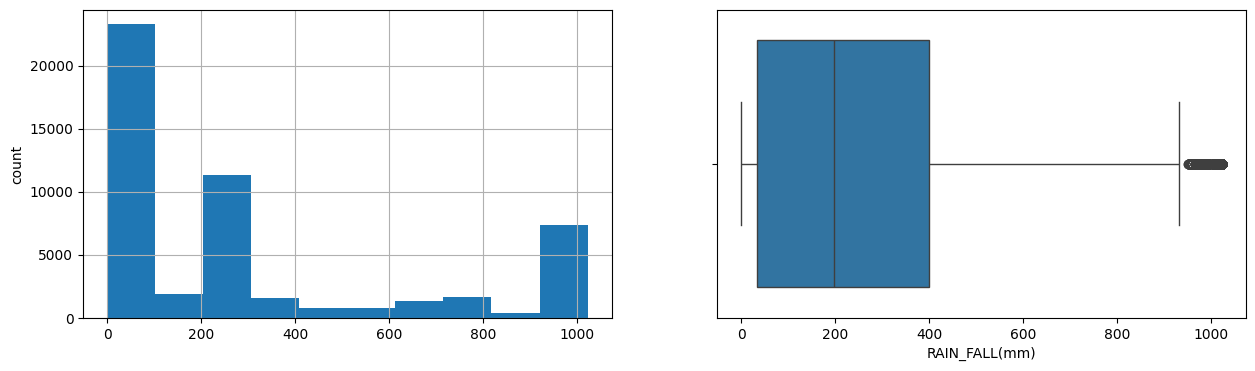

In [ ]:
# EDA Univariate analysis
for col in num_cols:
    print(col)
    print('Skew :', round(data2[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data2[col].hist(grid=True)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data2[col])
    plt.show()

AIR_TEMP(°C)


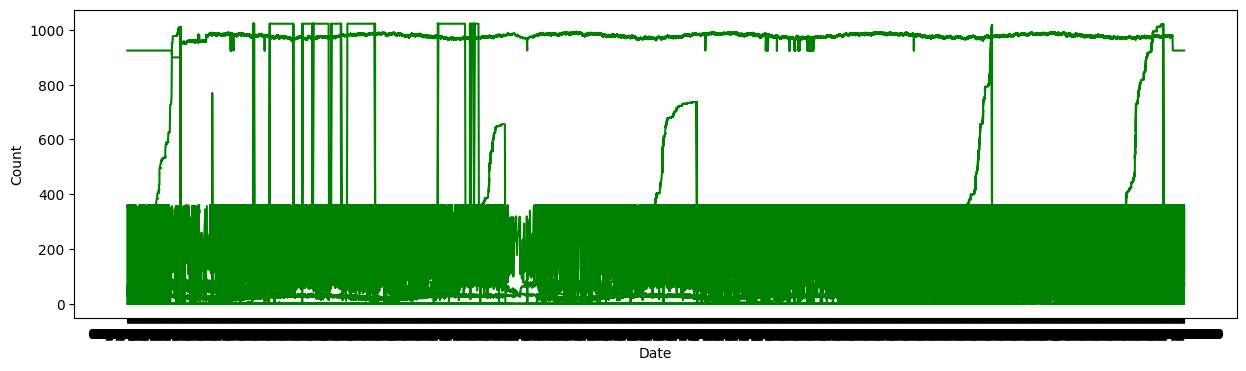

WIND_SPEED(m/s)


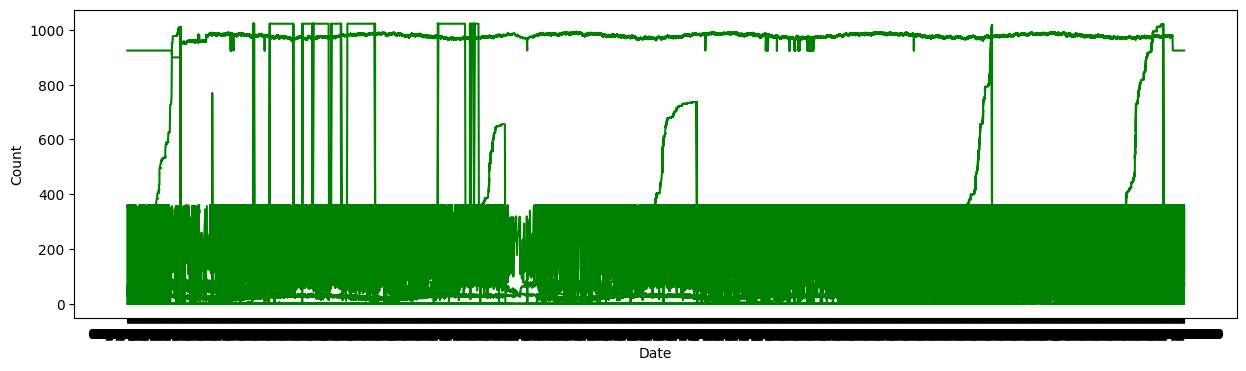

WIND_DIRECTION(deg)


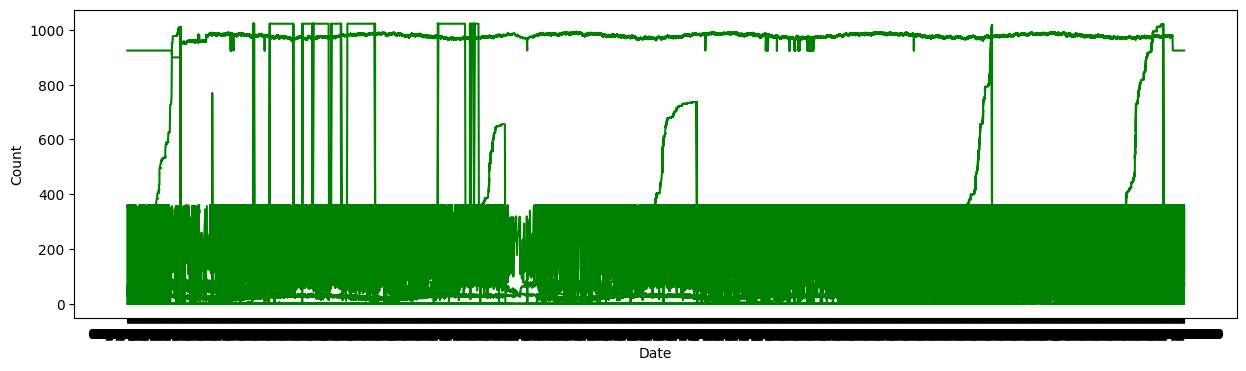

ATMO_PRESSURE(hpa)


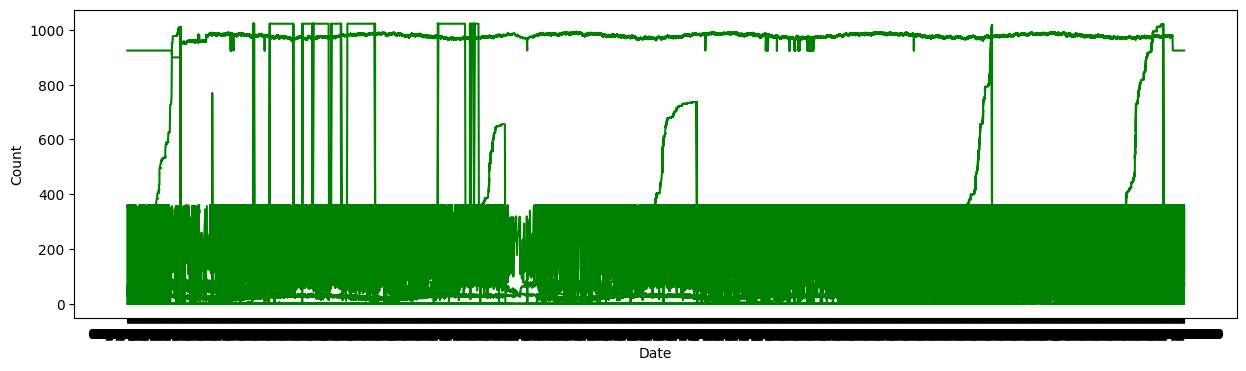

HUMIDITY(%)


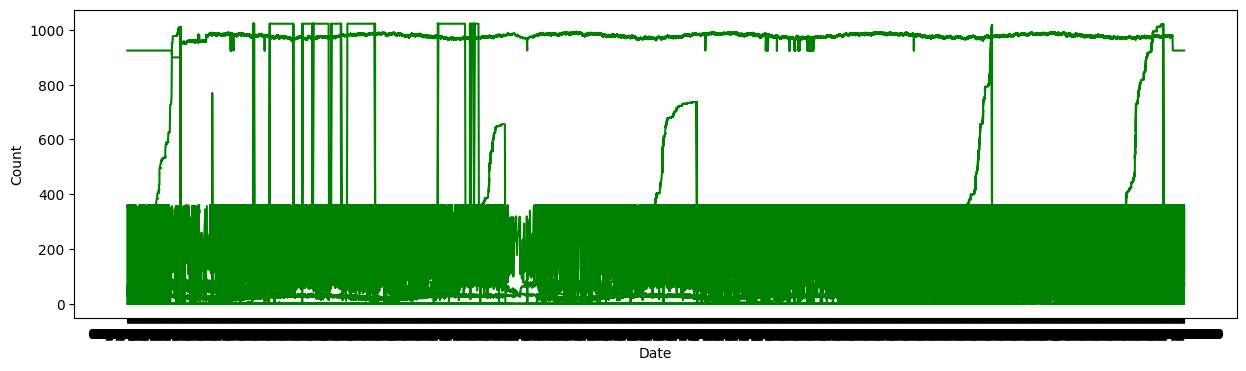

RAIN_FALL(mm)


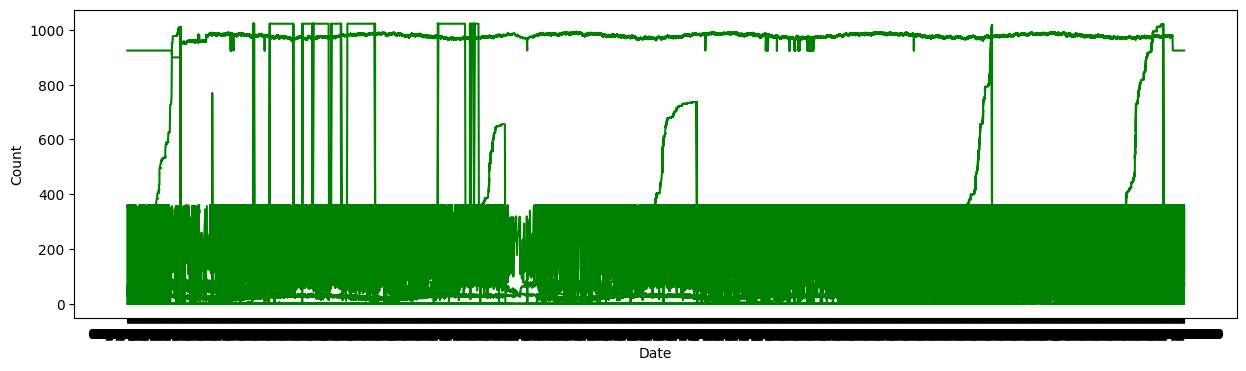

In [ ]:
# Visualizing the time series data
# def plot_data(data,x,y, title="", xlabel="", ylabel="", dpi = 100):
for col in num_cols:
  print(col)
  plt.figure(figsize=(15,4), dpi = 100)
  plt.plot(data2['DATE(IST)'],data2[num_cols], color = 'green')
  plt.gca().set(title = "", xlabel  = 'Date', ylabel = 'Count')
  plt.show()
# plot_data(data2, x=data2['DATE(IST)'], y=data2[num_cols],title='',xlabel = 'Date', ylabel = 'Count')

In [ ]:
# Finding the maximum values in each column
max_values  =data2.max()
print(max_values)

@STATION_ID            ISRO0930_15F3A2(DESE-ISM Dhanbad-)
TIME(IST)                                           23:30
DATE(IST)                                      12/31/2018
AIR_TEMP(°C)                                         47.0
WIND_SPEED(m/s)                                      47.0
WIND_DIRECTION(deg)                                 359.2
ATMO_PRESSURE(hpa)                                  994.5
HUMIDITY(%)                                         100.0
RAIN_FALL(mm)                                      1023.0
SUN_SHINE(hh:mm)                                     9964
dtype: object


In [ ]:
# Function for log transformation of the column
# def log_transform(data2, cols):
#     for colname in cols:
#         # Add 1 to avoid log(0) issues and handle non-positive values
#         data2[colname + '_log'] = np.log1p(data2[colname])
#     data2.info()
# # print(data.info())
def log_transform(data,col):
    for colname in col:
        if (data2[colname] == 1.0).all():
            data2[colname + '_log'] = np.log(data2[colname]+1)
        else:
            data2[colname + '_log'] = np.log(data2[colname])
    data2.info()

In [ ]:
log_transform(data2,['AIR_TEMP(°C)','WIND_SPEED(m/s)','ATMO_PRESSURE(hpa)','HUMIDITY(%)','RAIN_FALL(mm)'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50194 entries, 0 to 50193
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   @STATION_ID             50194 non-null  object 
 1   TIME(IST)               50194 non-null  object 
 2   DATE(IST)               50194 non-null  object 
 3   AIR_TEMP(°C)            49985 non-null  float64
 4   WIND_SPEED(m/s)         50192 non-null  float64
 5   WIND_DIRECTION(deg)     49593 non-null  float64
 6   ATMO_PRESSURE(hpa)      50192 non-null  float64
 7   HUMIDITY(%)             50193 non-null  float64
 8   RAIN_FALL(mm)           50182 non-null  float64
 9   SUN_SHINE(hh:mm)        50194 non-null  object 
 10  AIR_TEMP(°C)_log        49985 non-null  float64
 11  WIND_SPEED(m/s)_log     50192 non-null  float64
 12  ATMO_PRESSURE(hpa)_log  50192 non-null  float64
 13  HUMIDITY(%)_log         50193 non-null  float64
 14  RAIN_FALL(mm)_log       50182 non-null

<Axes: xlabel='AIR_TEMP(°C)_log', ylabel='Density'>

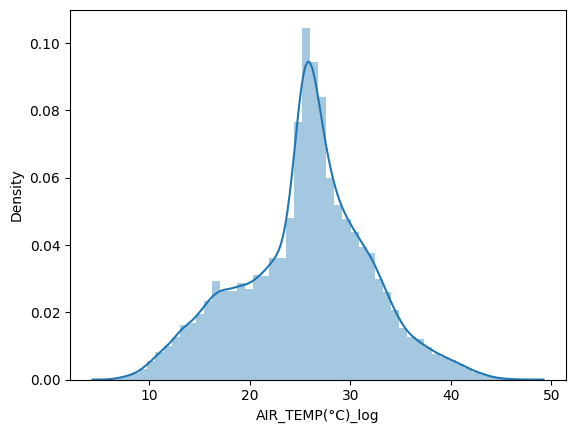

In [ ]:
#Log transformation of the features
sns.distplot(data2["AIR_TEMP(°C)"],axlabel = "AIR_TEMP(°C)_log")

<Axes: xlabel='WIND_SPEED(m/s)_log', ylabel='Density'>

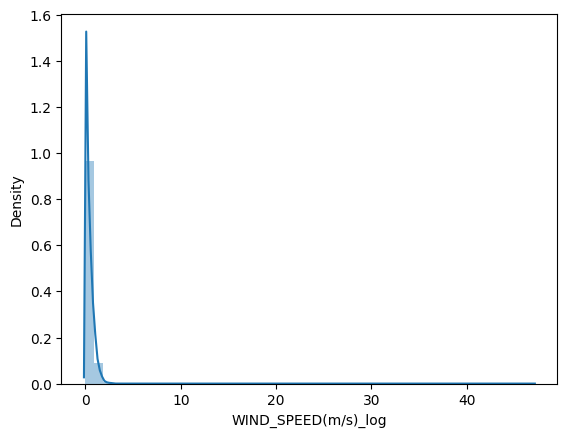

In [ ]:
sns.distplot(data2["WIND_SPEED(m/s)"],axlabel = "WIND_SPEED(m/s)_log")

<Axes: xlabel='ATMO_PRESSURE(hpa)_log', ylabel='Density'>

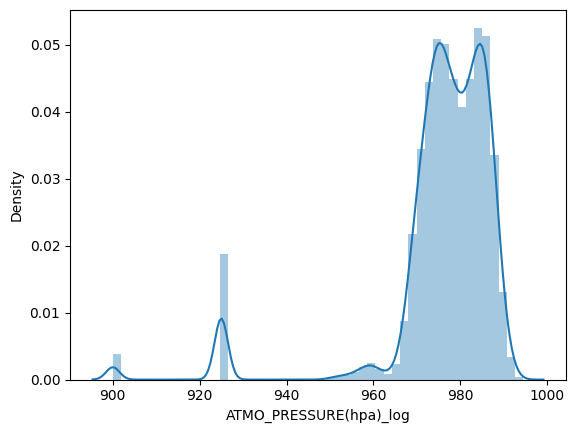

In [ ]:
sns.distplot(data2["ATMO_PRESSURE(hpa)"],axlabel = "ATMO_PRESSURE(hpa)_log")

<Axes: xlabel='HUMIDITY(%)_log', ylabel='Density'>

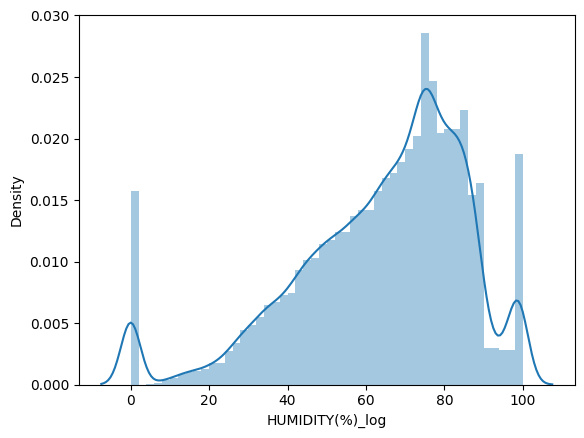

In [ ]:
sns.distplot(data2["HUMIDITY(%)"],axlabel = "HUMIDITY(%)_log")

<Axes: xlabel='RAIN_FALL(mm)_log', ylabel='Density'>

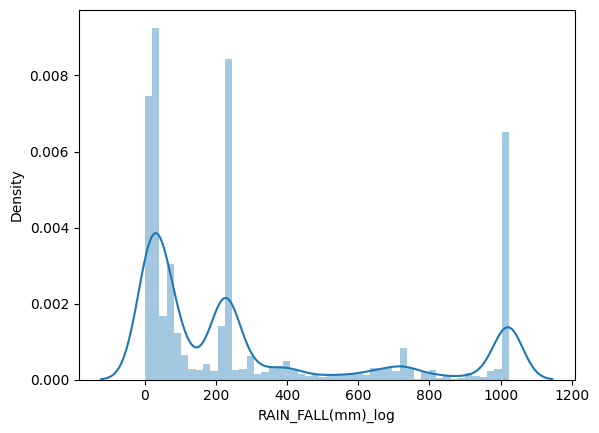

In [ ]:
sns.distplot(data2["RAIN_FALL(mm)"],axlabel = "RAIN_FALL(mm)_log")

In [ ]:
#Correlation Matrix
corr_matrix = data2.select_dtypes(include=np.number).corr()
corr_matrix

,AIR_TEMP(°C),WIND_SPEED(m/s),WIND_DIRECTION(deg),ATMO_PRESSURE(hpa),HUMIDITY(%),RAIN_FALL(mm),AIR_TEMP(°C)_log,WIND_SPEED(m/s)_log,ATMO_PRESSURE(hpa)_log,HUMIDITY(%)_log,RAIN_FALL(mm)_log
AIR_TEMP(°C),1.000000,0.389329,-0.272228,-0.264804,-0.307520,0.184657,0.980863,0.284796,-0.258160,-0.406083,0.187880
WIND_SPEED(m/s),0.389329,1.000000,-0.336358,-0.099190,-0.121286,0.085325,0.364403,0.780519,-0.097285,-0.200200,0.082848
WIND_DIRECTION(deg),-0.272228,-0.336358,1.000000,0.138546,-0.023145,-0.081389,-0.270170,0.068229,0.136453,0.032350,-0.080892
ATMO_PRESSURE(hpa),-0.264804,-0.099190,0.138546,1.000000,-0.051029,-0.181518,-0.268846,-0.054675,0.999902,-0.109775,-0.237737
HUMIDITY(%),-0.307520,-0.121286,-0.023145,-0.051029,1.000000,0.177782,-0.266303,-0.138570,-0.050137,0.967850,0.142860
RAIN_FALL(mm),0.184657,0.085325,-0.081389,-0.181518,0.177782,1.000000,0.198370,0.122360,-0.179107,0.220778,0.836829
AIR_TEMP(°C)_log,0.980863,0.364403,-0.270170,-0.268846,-0.266303,0.198370,1.000000,0.277558,-0.262102,-0.344308,0.200760
WIND_SPEED(m/s)_log,0.284796,0.780519,0.068229,-0.054675,-0.138570,0.122360,0.277558,1.000000,-0.052996,-0.155963,0.132754
ATMO_PRESSURE(hpa)_log,-0.258160,-0.097285,0.136453,0.999902,-0.050137,-0.179107,-0.262102,-0.052996,1.000000,-0.108756,-0.234951
HUMIDITY(%)_log,-0.406083,-0.200200,0.032350,-0.109775,0.967850,0.220778,-0.344308,-0.155963,-0.108756,1.000000,0.174477


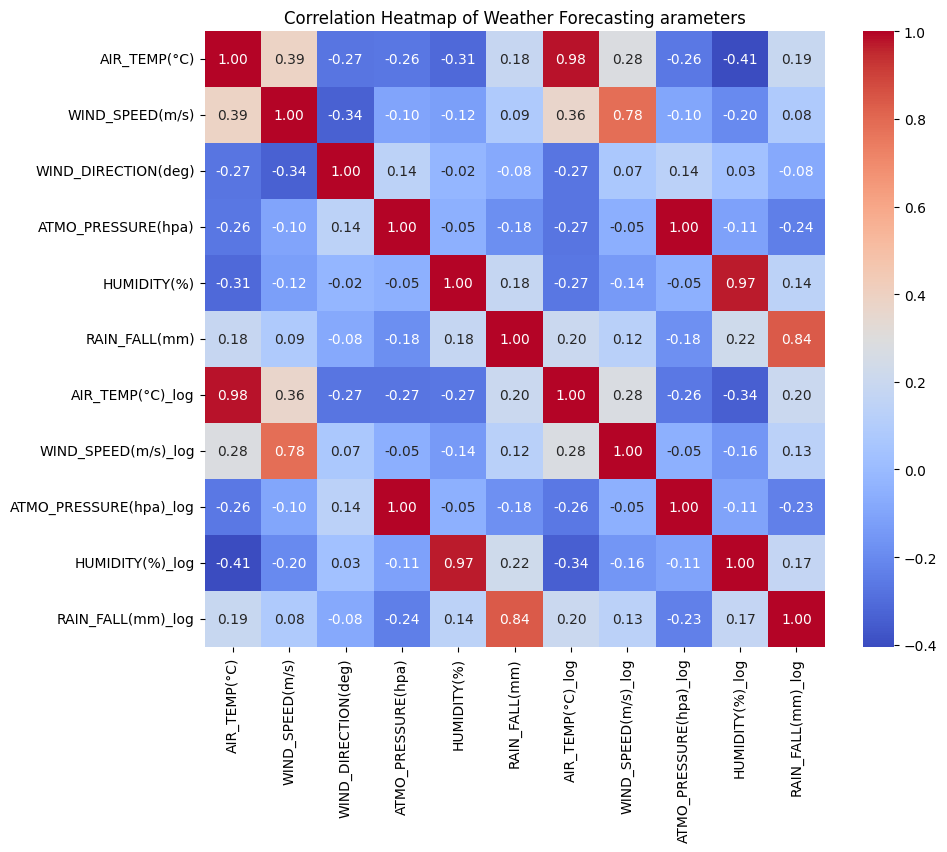

In [ ]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# .2f means till 2 decimal placces
plt.title('Correlation Heatmap of Weather Forecasting arameters')
plt.show()

In [ ]:
# Finding the Missing Dates
import time
import datetime
#Loading the date list
date_list = data2['DATE(IST)']
#Converting to datetime objects
# Converting to datetime objects using both possible formats
def parse_date(date_str):
    for fmt in ("%m-%d-%Y", "%m/%d/%Y"):
        try:
            return datetime.datetime.strptime(date_str, fmt).date()
        except ValueError:
            pass
    raise ValueError(f"Date {date_str} does not match any expected format")

date_list = [parse_date(date) for date in date_list]
#Determine the date range
start_date = min(date_list)
end_date = max(date_list)
# Generating the full date range
full_date_range = [start_date + datetime.timedelta(days = x) for x in range((end_date - start_date).days +1)]
# Finding the Missing Dates
missing_dates = sorted(set(full_date_range) - set(date_list))
#Printing the missing dates
c = len(missing_dates)
print("Missing Dates:")
for date in missing_dates:
  print(date)
# Print the total number of missing dates
print(f"Total number of missing dates: {c}")

Missing Dates:
2010-05-11
2010-05-13
2010-05-21
2010-05-23
2010-05-25
2010-05-29
2010-05-31
2010-06-02
2010-06-04
2010-06-12
2010-08-24
2010-08-25
2010-08-26
2010-08-27
2010-08-28
2010-08-29
2010-08-30
2010-08-31
2010-09-03
2010-09-04
2010-09-05
2010-09-07
2010-09-08
2010-09-09
2010-09-10
2010-09-12
2010-09-13
2010-09-14
2010-09-15
2010-09-16
2010-09-17
2010-09-18
2010-09-21
2010-09-22
2010-09-23
2010-11-20
2011-09-28
2012-06-21
2012-06-22
2012-06-23
2012-06-24
2012-10-20
2012-10-21
2012-10-30
2012-10-31
2012-11-01
2012-11-02
2012-11-03
2012-11-04
2012-11-05
2012-11-06
2012-11-07
2012-11-08
2012-11-09
2012-11-10
2012-11-11
2012-11-12
2012-11-13
2012-11-14
2012-11-15
2012-11-16
2012-11-17
2012-11-18
2012-11-19
2012-11-20
2012-11-21
2012-11-22
2012-11-23
2012-11-24
2012-11-25
2012-11-26
2012-11-27
2012-11-28
2012-11-29
2012-11-30
2012-12-01
2012-12-02
2012-12-03
2012-12-04
2012-12-05
2012-12-06
2012-12-07
2012-12-08
2012-12-09
2012-12-10
2012-12-11
2012-12-12
2012-12-13
2012-12-14
2012-1

In [ ]:
# Identifying the missing timestamps
# Convert the TIME(IST) column to datetime
data2['TIME(IST)'] = pd.to_datetime(data2['TIME(IST)'])
# Set the TIME(IST) column as index
data2.set_index('TIME(IST)', inplace=True)
# Generate the complete range of timestamps at 60-minute intervals
full_range = pd.date_range(start=data2.index.min(), end=data2.index.max(), freq='60T')
# Identify missing timestamps
missing_timestamps = full_range.difference(data2.index)
print("Missing timestamps:")
print(missing_timestamps)

Missing timestamps:
DatetimeIndex([], dtype='datetime64[ns]', freq=None)
